# Mini-Projet :  Détection de sons de Beatbox

## Nom du binôme :

L'objectif de ce TP consiste à détecter et reconnaître les différents sons de beatbox à partir de fichiers sonores au format *.wav* via l'analyse cepstrale.


<img src="./Sons_Beatbox.png" width="800">



Vous disposez d'une base d'enregistrements de beatbox. Il faut reconnaître les 12 sons beatbox suivants :

$$\text{'cymbale_expiree', 'cymbale_inspiree', 'hihat_humming', 'hihat_power ferme', 'hihat_power ouvert', 'kick_humming', }$$
$$\text{'kick_power','rimshot_humming', 'rimshot_power', 'snare_humming', 'snare_power', 'snare_power inverse'}$$


**Source :** https://pubs.aip.org/asa/jasa/article/149/1/191/610401 \
Paroni, Annalisa, et al. *Vocal drum sounds in human beatboxing: An acoustic and articulatory exploration using electromagnetic articulography.* The Journal of the Acoustical Society of America 149.1 (2021): 191-206.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import scipy
import sklearn
import math
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from itertools import count
import seaborn as sns

# Chargement des données


Le fichier source sur lequel vous travaillez est la conversion des enregistrements audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel du signal audio.

La matrice de données est composée d'autant de vecteurs lignes que de fichiers audio. Le nombre de colonnes correspond à la dimension du vecteur moyen représentatif des MFCC : ici 13.

In [3]:
# Chargement des données à partir d'un fichier matlab .mat
import scipy.io as sio
test = sio.loadmat('2016HBXX_effets_mfcc_nodeltas_XY_nozcaPerFile_zcaX.mat')


# data = matrice des données : nombre d'enregistrements x 13 coefficients
data=test['X']
data=np.array(data)
data=data.astype('float64')
print('Dimension de la matrice des MFCC :',data.shape)

# label = Numéro correspondant à un son de beatbox associé à chaque enregistrement
label=test['Y']
label=np.ravel(label)
print('Dimension des labels', label.shape)

# liste des sons de beatbox
Nomlabel=['cymbale_expiree', 'cymbale_inspiree', 'hihat_humming', 'hihat_power ferme', 'hihat_power ouvert', 'kick_humming','kick_power','rimshot_humming', 'rimshot_power', 'snare_humming', 'snare_power', 'snare_power inverse']



Dimension de la matrice des MFCC : (341, 13)
Dimension des labels (341,)


In [4]:
# Description du jeu de données
unique, counts = np.unique(label, return_counts=True)


for i in range(unique.shape[0]):
    print('Label',unique[i],'correspond à ',Nomlabel[i],':',counts[i],'enregistrements');

Label 0 correspond à  cymbale_expiree : 28 enregistrements
Label 1 correspond à  cymbale_inspiree : 18 enregistrements
Label 2 correspond à  hihat_humming : 37 enregistrements
Label 3 correspond à  hihat_power ferme : 20 enregistrements
Label 4 correspond à  hihat_power ouvert : 24 enregistrements
Label 5 correspond à  kick_humming : 37 enregistrements
Label 6 correspond à  kick_power : 42 enregistrements
Label 7 correspond à  rimshot_humming : 25 enregistrements
Label 8 correspond à  rimshot_power : 38 enregistrements
Label 9 correspond à  snare_humming : 30 enregistrements
Label 10 correspond à  snare_power : 22 enregistrements
Label 11 correspond à  snare_power inverse : 20 enregistrements


###  Découpage de l'ensemble de données en Apprentissage et test pour les approches supevisée.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)

### Fonctions pour réaliser une table de correspondance entre le label des approches non supervisées et le label réel

In [6]:
def retrieve_info(cluster_labels,y_train):
 #Associe l'étiquette la plus probable à chaque groupe dans le modèle KMeans.
 #Résultats : dictionnaire des clusters associés à chaque étiquette.

# Initialisation
  reference_labels = np.zeros((len(np.unique(cluster_labels)),1))
# Loop pour chaque label
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

def correspondance(y_pred_kmeans,y_train):
  # Correspondance entre la partition et les classes de la vérité terrain
  reference_labels = retrieve_info(y_pred_kmeans,y_train)
  number_labels = np.zeros(len(y_pred_kmeans))
  for i in range(len(y_pred_kmeans)):
    number_labels[i] = reference_labels[y_pred_kmeans[i]]
  return number_labels


# Partie I : Classification des sons beatbox sans prétraitement

Réaliser une classification de ces sons de beatbox par une méthode d'apprentissage supervisé et une méthode d'apprentissage non supervisé de votre choix en utilisant soit les codes des TP précédents, soit en utilisant la librairie *scikit-learn*.

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser l'image des signaux présenté ci-dessus pour interpréter les résultats.

## Méthode supervisée  :
indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
models = []
for k in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = round(knn.score(X_test, y_test), 3)  # pour garder 3 chiffres significatifs après virgule
    models.append(score)

print(models)

[0.938, 0.947, 0.956, 0.956, 0.956, 0.947, 0.947, 0.938]


In [36]:
k=3
knn3 = KNeighborsClassifier(n_neighbors=k)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Précision :  0.9557522123893806


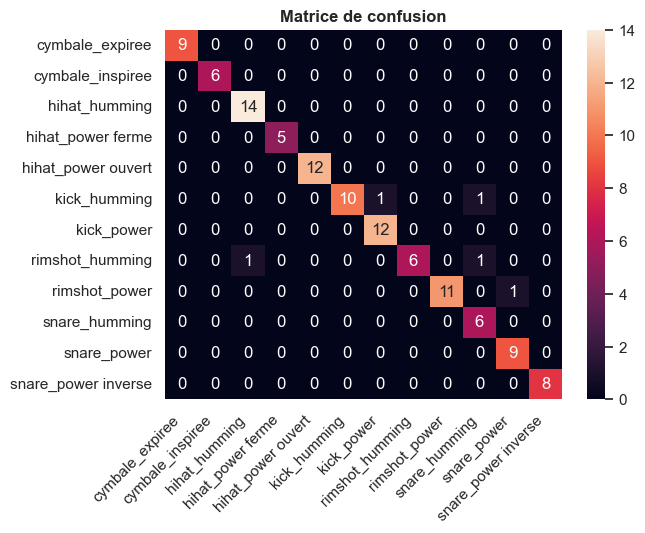

In [37]:
print("Précision : ", knn3.score(X_test, y_test))

con_matrix = confusion_matrix(y_test, knn3.predict(X_test))

sns.set_theme()

fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=45)

sns.heatmap(con_matrix, annot=True, xticklabels=Nomlabel, yticklabels=Nomlabel)

ax.set_title("Matrice de confusion", fontweight="bold")
plt.set_xlabel="Valeurs prédites"
plt.set_ylabel="Valeurs réelles"
plt.setp(ax.get_xticklabels(), ha="right", va="top", rotation=45)

plt.show()

## Méthode non supervisée
Indiquer quelle est la méthode non supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [46]:
#Utilisation de k-means

nb_clusters = 25

y_pred = np.zeros((nb_clusters,341), dtype='int')
y_pred_labeled = np.zeros((nb_clusters,341), dtype='int')
accuracy = np.zeros(nb_clusters)

for i in range(0,nb_clusters):
  cl = KMeans(n_clusters=i+1,n_init='auto',random_state=42)
  y_pred[i] = cl.fit_predict(data)
  y_pred_labeled[i] = correspondance(y_pred[i],label)
  accuracy[i] = accuracy_score(label,y_pred_labeled[i])

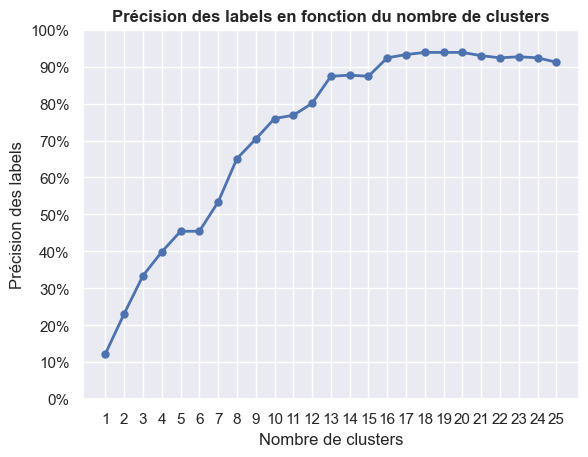

In [42]:
fig, ax = plt.subplots()

ax.plot(np.arange(1,nb_clusters+1),np.multiply(accuracy,100),marker='.', lw=2.0, mew=3.0)
plt.xticks(np.arange(1,nb_clusters+1))
plt.yticks(np.arange(0,110,10))
plt.title("Précision des labels en fonction du nombre de clusters", fontweight="bold")
ax.set_xlabel("Nombre de clusters")
ax.set_ylabel("Précision des labels")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True)


Précision :  0.9237536656891495


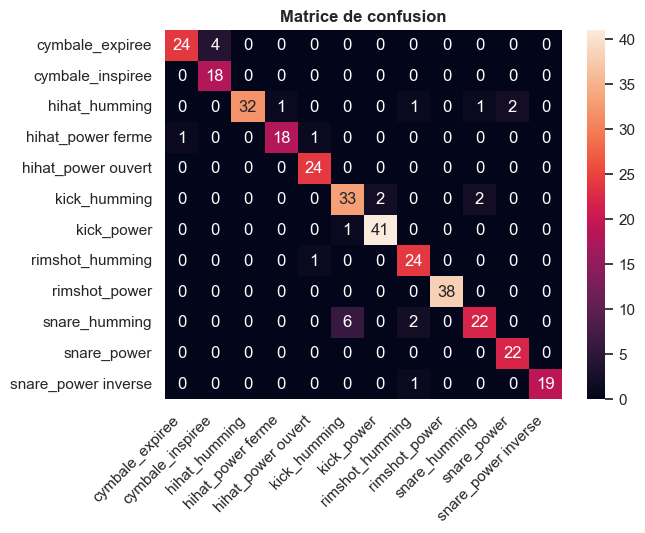

In [47]:
choice_clusters = 16
print("Précision : ", accuracy[choice_clusters-1])

con_matrix = confusion_matrix(label,y_pred_labeled[choice_clusters-1])

sns.set_theme()

fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=45)

sns.heatmap(con_matrix, annot=True, xticklabels=Nomlabel, yticklabels=Nomlabel)

ax.set_title("Matrice de confusion", fontweight="bold")
plt.set_xlabel="Valeurs prédites"
plt.set_ylabel="Valeurs réelles"
plt.setp(ax.get_xticklabels(), ha="right", va="top", rotation=45)

plt.show()

# Partie II : Classification des sons beatbox avec prétraitement


## Méthode supervisée avec réduction de dimension par ACP sur l'ensemble d'apprentissage
Réaliser une ACP sur l'ensemble d'apprentissage pour réduire la dimension, visualiser les données
puis projeter les données de l'ensemble de test dans la base de l'ACP.

Indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [14]:
from sklearn.decomposition import PCA

In [48]:
kept_data_supervised = np.empty(0)

for n in range(0,13):
  pca_test_supervised = PCA(n_components=n)
  pca_test_supervised.fit(X_train)

  evr = pca_test_supervised.explained_variance_ratio_
  kept_data_supervised = np.append(kept_data_supervised,sum(evr))

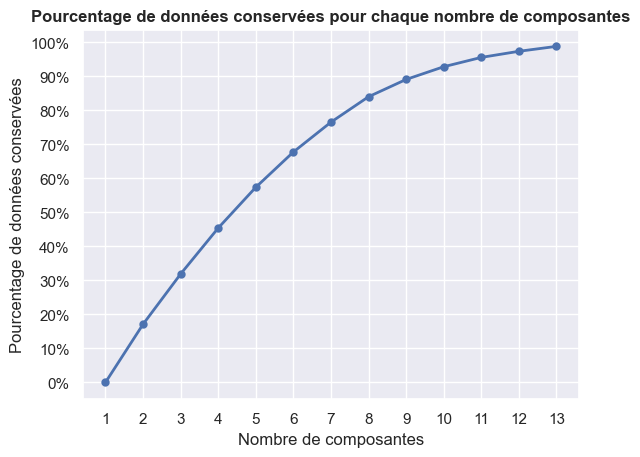

In [49]:
fig, ax = plt.subplots()

ax.plot(np.arange(1,13+1),np.multiply(kept_data_supervised,100),marker='.', lw=2.0, mew=3.0)
plt.xticks(np.arange(1,13+1))
plt.yticks(np.arange(0,110,10))
plt.title("Pourcentage de données conservées pour chaque nombre de composantes",fontweight="bold")
ax.set_xlabel("Nombre de composantes")
ax.set_ylabel("Pourcentage de données conservées")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True)

In [50]:
acp = PCA(n_components=8)
X_train_pca = acp.fit_transform(X_train)
X_test_pca = acp.transform(X_test)

k=3
knnPCA = KNeighborsClassifier(n_neighbors=k)
knnPCA.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

Précision :  0.9203539823008849


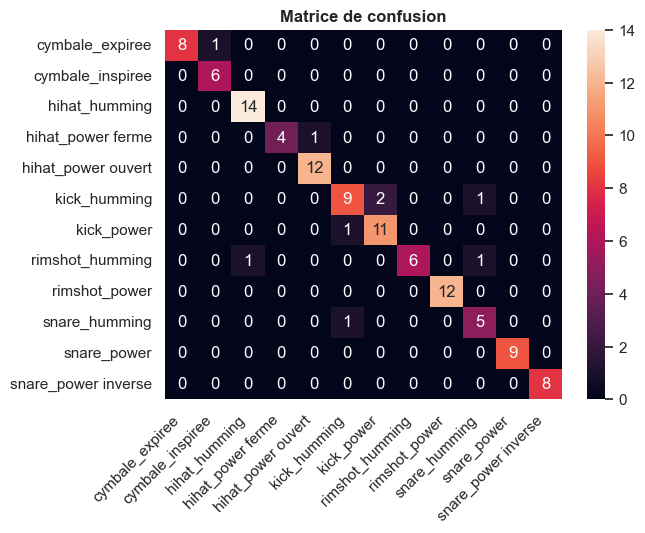

In [51]:
print("Précision : ", knnPCA.score(X_test_pca, y_test))

con_matrix = confusion_matrix(y_test, knnPCA.predict(X_test_pca))

sns.set_theme()

fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=45)

sns.heatmap(con_matrix, annot=True, xticklabels=Nomlabel, yticklabels=Nomlabel)

ax.set_title("Matrice de confusion", fontweight="bold")
plt.set_xlabel="Valeurs prédites"
plt.set_ylabel="Valeurs réelles"
plt.setp(ax.get_xticklabels(), ha="right", va="top", rotation=45)

plt.show()


## Méthode non supervisée avec réduction de dimension par ACP sur l'ensemble des données

Réaliser une ACP sur l'ensemble des données et indiquer quelle est la méthode supervisée de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

In [25]:
kept_data_unsupervised = np.empty(0)

for n in range(0,13):
  pca_test_unsupervised = PCA(n_components=n)
  pca_test_unsupervised.fit(data)

  evr = pca_test_unsupervised.explained_variance_ratio_
  kept_data_unsupervised = np.append(kept_data_unsupervised,sum(evr))

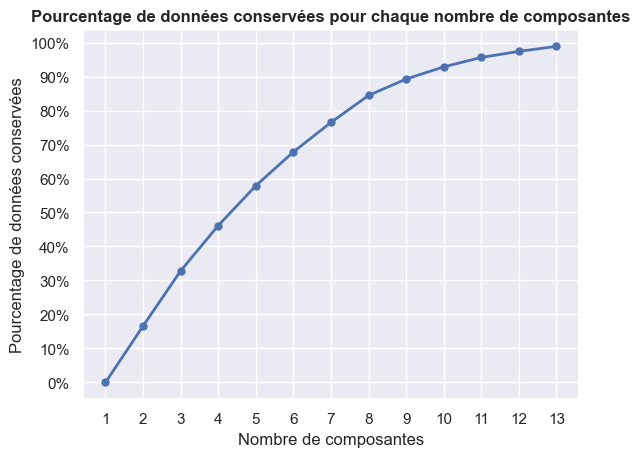

In [26]:
fig, ax = plt.subplots()

ax.plot(np.arange(1,13+1),np.multiply(kept_data_unsupervised,100),marker='.', lw=2.0, mew=3.0)
plt.xticks(np.arange(1,13+1))
plt.yticks(np.arange(0,110,10))
plt.title("Pourcentage de données conservées pour chaque nombre de composantes", fontweight="bold")
ax.set_xlabel("Nombre de composantes")
ax.set_ylabel("Pourcentage de données conservées")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True)

In [65]:
#Utilisation de k-means

nb_clusters = 25

y_pred_pca = np.zeros((nb_clusters,341), dtype='int')
y_pred_labeled_pca = np.zeros((nb_clusters,341), dtype='int')
accuracy_pca = np.zeros(nb_clusters)

for i in range(0,nb_clusters):
  cl = KMeans(n_clusters=i+1,n_init='auto',random_state=42)
  pca = PCA(n_components=8)
  y_pred_pca[i] = cl.fit_predict(pca.fit_transform(data))
  y_pred_labeled_pca[i] = correspondance(y_pred_pca[i],label)
  accuracy_pca[i] = accuracy_score(label,y_pred_labeled_pca[i])

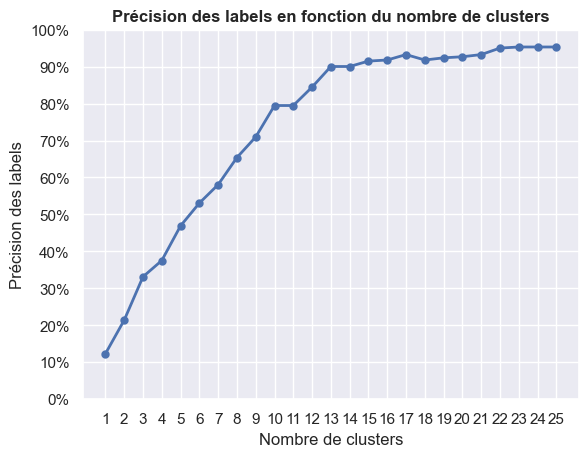

In [66]:
fig, ax = plt.subplots()

ax.plot(np.arange(1,nb_clusters+1),np.multiply(accuracy_pca,100),marker='.', lw=2.0, mew=3.0)
plt.xticks(np.arange(1,nb_clusters+1))
plt.yticks(np.arange(0,110,10))
plt.title("Précision des labels en fonction du nombre de clusters", fontweight="bold")
ax.set_xlabel("Nombre de clusters")
ax.set_ylabel("Précision des labels")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True)

Précision :  0.9178885630498533


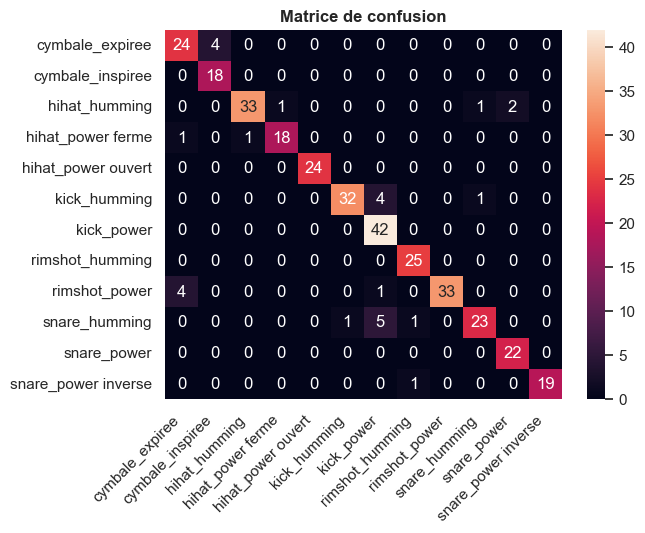

In [68]:
choice_clusters = 16
print("Précision : ", accuracy_pca[choice_clusters-1])

con_matrix = confusion_matrix(label,y_pred_labeled_pca[choice_clusters-1])

sns.set_theme()

fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=45)

sns.heatmap(con_matrix, annot=True, xticklabels=Nomlabel, yticklabels=Nomlabel)

ax.set_title("Matrice de confusion", fontweight='bold')
plt.set_xlabel="Valeurs prédites"
plt.set_ylabel="Valeurs réelles"
plt.setp(ax.get_xticklabels(), ha="right", va="top", rotation=45)

plt.show()

# Partie III : Votre analyse


Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser l'article et les signaux présentés ci-dessus pour interpréter les résultats.

Un rapport de maximum 10 pages sera à rendre avec le notebook des codes ayant donné ces résultats.